## Analysis
---

#### Import Scripts

In [40]:
%run -i '../scripts/tw_net_cleaning.py'

In [41]:
%run -i '../scripts/tw_net_analysis.py'

In [42]:
%run -i '../scripts/tw_net_extraction.py'

#### Load & Clean Tweets

In [73]:
'''
Enter days/sets/calls combination to select 
one or more sets of tweets to be returned as dataframe.

'''
days = [11,12,13,14,15,16,17]
sets = [1,2,3,4,5,6]
calls = [1]
tweets_per_call = 150

df = TweetsToDataframe(days,sets,calls,tweets_per_call,useWeights=True)

df.head()

../scripts/tw_net_extraction.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # , 'bigrams_user_screen_name',
../scripts/tw_net_extraction.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # 'trigrams_user_screen_name', 'quadgrams_user_screen_name',
../scripts/tw_net_extraction.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

,id_str,text,created_hr,created_dotw,calltime,day,set,call,favorite_count,retweet_count,...,profile_background_color,profile_text_color,user_screen_name,statuses_count,verified,num_tags,num_media,num_symbols,num_urls,num_user_mentions
0,1094936570350747648,First day at my new job 😌,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,F5F8FA,333333,racheeelLehman,126,False,0,0,0,0,0
1,1094936596519026688,@AlexHolleyFOX29 Absolutely!,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,F5F8FA,333333,DierolfWilliam,1010,False,0,0,0,0,1
2,1094936629930852352,PM loses moral high ground? I think he lost th...,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,F5F8FA,333333,WestPpc,86,False,0,0,0,1,0
3,1094936651741229057,Lawyers of the @TeamCavuto Please Please List...,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,000000,000000,DuffGear,1240,False,0,0,0,1,1
4,1094936745190264832,@marklevinshow I AM A PROTECTED CLASS. NO ONE ...,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,F5F8FA,333333,SergioAntoni7,5849,False,0,0,0,1,1


In [44]:
df.describe()

,favorite_count,retweet_count,influence_score,user_since,favorites_counts,followers_count,friends_count,listed_count,statuses_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions
count,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000,28245.000000
mean,1.257745,0.219685,57.239888,5.435404,20650.295557,2177.477288,1521.484865,30.584280,28210.544061,0.195256,0.094778,0.000177,0.412781,1.075482
std,8.292870,2.015008,211.008287,3.125459,40597.276387,8211.722059,3620.172550,106.995038,50862.893529,0.741141,0.292913,0.013304,0.501393,1.542706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.400000,3.000000,1374.000000,158.000000,248.000000,1.000000,2269.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,13.100000,6.000000,6076.000000,457.000000,579.000000,4.000000,9335.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,37.825000,8.000000,19721.000000,1422.000000,1454.000000,19.000000,27268.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,469.000000,145.000000,3947.000000,12.000000,468557.000000,154189.000000,51921.000000,2332.000000,371459.000000,9.000000,1.000000,1.000000,2.000000,10.000000


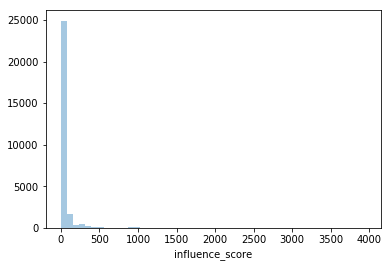

In [36]:
'''
Distribution of influence scores
'''
ax = sns.distplot(df['influence_score'],kde=False)

In [45]:
outliers = df['influence_score'].mean()+ df['influence_score'].std()*3.5

df = df[df['influence_score'] < outliers]

/Users/jessedecker/miniconda3/envs/gis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


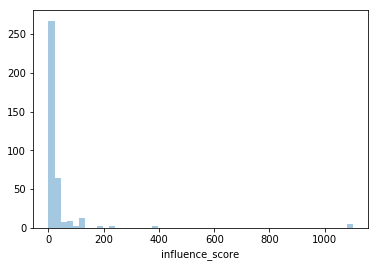

In [78]:
ax = sns.distplot(df['influence_score'],kde=False)

#### Preview Feature Set

In [68]:
'''
Wrap all but text. Leave identifiers and text to check.
''' 
preview_df = PreviewFeatureSet(df,isRandom=True)
preview_df.head()

,tweet_id,text,created_hr,set,favorite_count,retweet_count,influence_score,user_description,user_since,favorites_counts,...,num_tags,num_media,num_symbols,num_urls,num_user_mentions,influence_interval,isVerified,isRetweeted,isReply,dotw
3232,1097611646720200706,Las #Vegas residents receive a surprise snow s...,16,5,1,0,2177.375,"Excellence is not an act, but a habit. https:...",9,4934,...,1,0,0,1,0,2,0,0,0,2
4198,1097644412308504576,Four people dead in alleged shooting in northe...,18,6,0,0,2177.075,"Excellence is not an act, but a habit. https:...",9,4939,...,0,0,0,1,0,4,0,0,0,2
228,1097476497034629120,"Me: today is a holiday, Presidents Day\n\n3 ye...",7,1,43,2,1643.600,Founder of https://t.co/if9qEBg0Vc - Live Trad...,9,297,...,0,0,0,1,0,1,0,1,0,2
801,1097508963631984642,@Stillbluemagic @BillionTwiTs Y’all don’t rate me,9,2,0,0,1567.650,I'm not an artist but I can draw your attentio...,2,106,...,0,0,0,0,2,0,0,0,1,2
76,1097476304511873025,Have you signed up yet? “Mark Your Calendars f...,7,1,0,0,1416.825,Principal Technology Solutions Professional at...,11,18430,...,0,0,0,1,0,0,0,0,0,2


In [47]:
preview_df.describe()

,favorite_count,retweet_count,influence_score,user_since,favorites_counts,followers_count,friends_count,listed_count,statuses_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions,influence_interval,isVerified,isRetweeted,isReply,dotw
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000
mean,1.694311,0.254267,36.135170,5.475274,20309.081619,1349.806565,1315.208096,23.055361,28010.802626,0.175711,0.058206,0.000219,0.443982,1.063895,2.543545,0.005470,0.114004,0.497374,3.996061
std,7.893801,1.595884,70.391836,3.102315,39426.112029,2720.911515,2292.512475,53.511749,50942.881166,0.697979,0.234158,0.014793,0.503905,1.543655,1.383376,0.073768,0.317851,0.500048,1.987261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.500000,3.000000,1319.750000,158.250000,240.250000,1.000000,2253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,13.100000,6.000000,5945.000000,451.000000,553.500000,4.000000,9084.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,35.400000,8.000000,19615.500000,1266.500000,1364.000000,19.000000,26586.500000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000
max,224.000000,54.000000,694.725000,12.000000,468547.000000,26664.000000,25999.000000,901.000000,371328.000000,9.000000,1.000000,1.000000,2.000000,10.000000,4.000000,1.000000,1.000000,1.000000,7.000000


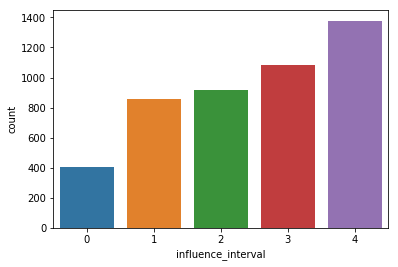

In [64]:
ax = sns.countplot(x="influence_interval", data=preview_df)

#### Extract and Save Feature Set

In [69]:
'''
Wrap text, remove identifiers/text, output ready for ml.
This takes forever.
''' 
featureSet = GetFeatureSet(preview_df)
featureSet.head()

,created_hr,set,favorite_count,retweet_count,influence_score,user_since,followers_count,listed_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions,influence_interval,isVerified,isRetweeted,isReply,dotw
3232,16,5,1,0,2177.375,9,84356,909,1,0,0,1,0,2,0,0,0,2
4198,18,6,0,0,2177.075,9,84356,909,0,0,0,1,0,4,0,0,0,2
228,7,1,43,2,1643.600,9,58181,2333,0,0,0,1,0,1,0,1,0,2
801,9,2,0,0,1567.650,2,62505,67,0,0,0,0,2,0,0,0,1,2
76,7,1,0,0,1416.825,11,51792,1627,0,0,0,1,0,0,0,0,0,2


In [70]:
file_io.WriteCSV(featureSet,'wk2_random_no_text')

In [87]:
'''
Read CSV for a target into a dataframe.
Do not add path or extension.
''' 

filename = 'weighted__nonrandom_no_text'

tmp = file_io.ReadCSV(filename)
tmp.head()

filename: ../data/models/weighted__nonrandom_no_text.csv


,created_hr,set,favorite_count,retweet_count,influence_score,user_since,followers_count,listed_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions,influence_interval,isVerified,isRetweeted,isReply,dotw
6253,12,3,0,0,694.725,6,26664,375,0,0,0,0,1,4,0,0,1,3
4061,18,6,0,0,694.450,6,26647,377,0,0,0,1,1,3,0,0,1,2
2758,14,4,18,0,685.575,10,25077,710,0,0,0,0,0,3,1,0,0,2
20915,7,1,41,0,636.875,0,24896,29,0,0,0,0,2,4,0,0,1,7
19501,16,5,0,0,574.550,8,22892,30,0,0,0,0,1,4,0,0,1,6


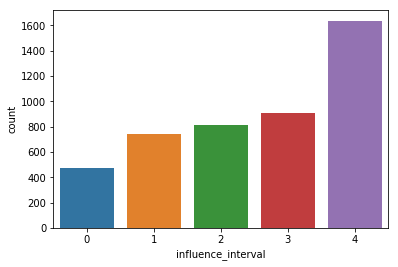

In [52]:
ax = sns.countplot(x="influence_interval", data=tmp)

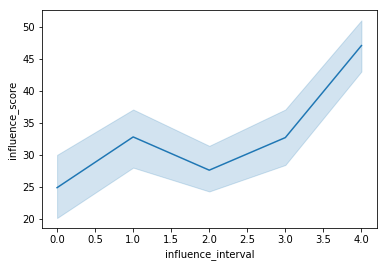

In [53]:
ax = sns.lineplot(x="influence_interval", y="influence_score", data=tmp)

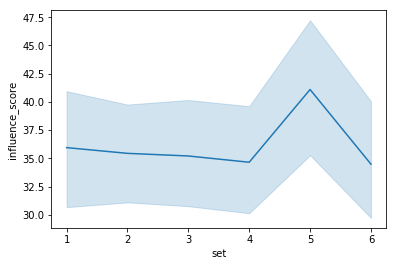

In [54]:
ax = sns.lineplot(x="set", y="influence_score", data=tmp)

In [58]:
cols = ['influence_score','influence_interval','retweet_count','favorite_count','listed_count','followers_count']
small = tmp[cols]

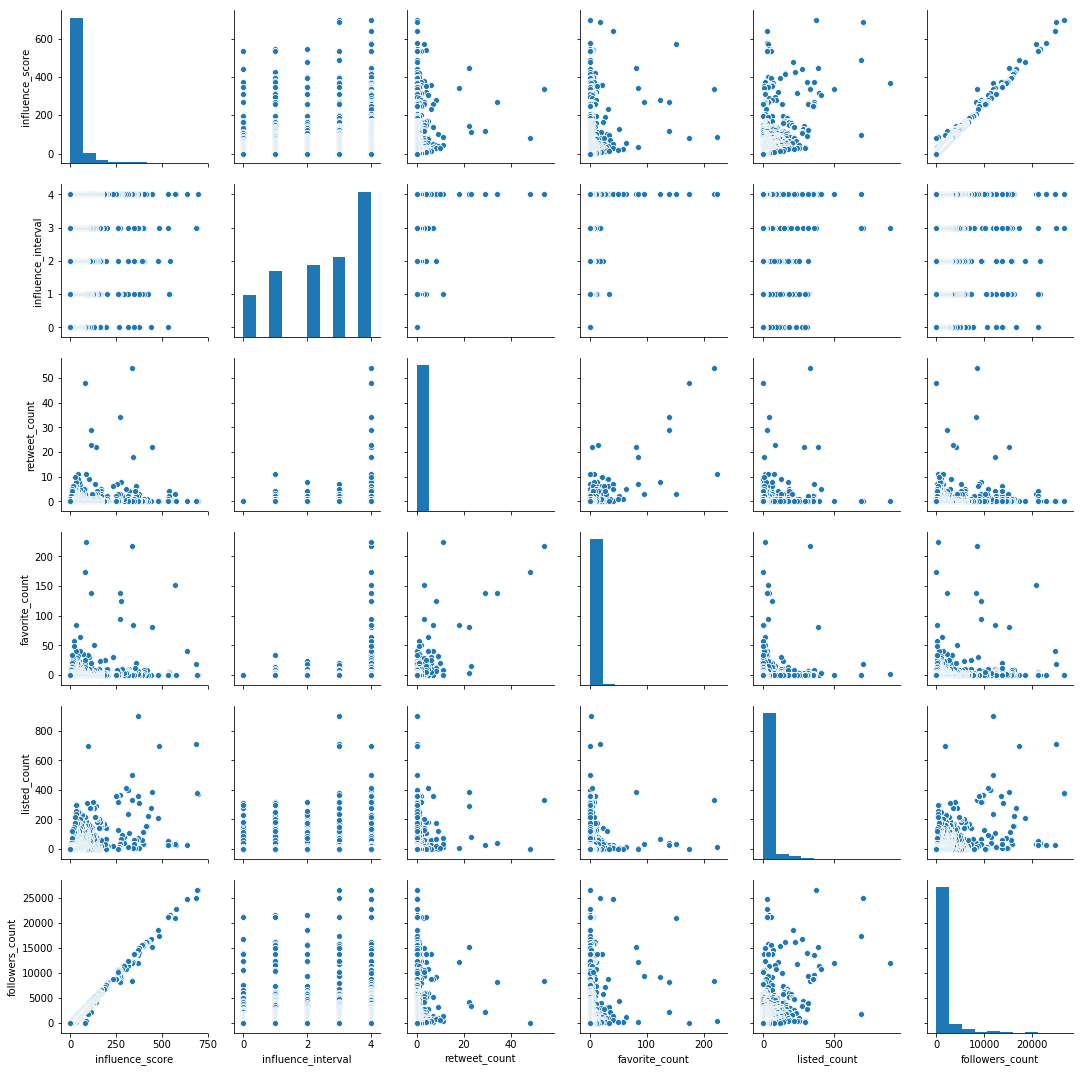

In [59]:
g = sns.pairplot(small)